# Background:

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

## Data Description:

- Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
- X1 = my order was delivered on time
- X2 = contents of my order was as I expected
- X3 = I ordered everything I wanted to order
- X4 = I paid a good price for my order
- X5 = I am satisfied with my courier
- X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

##### Goal(s):
Predict if a customer is happy or not based on the answers they give to questions asked.

##### Success Metrics:
Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

##### Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

Submission Instructions:
Project should be implemented with Python
Please name your repository on GitHub with this name without exposing your project information: UjZzgT16i2SLos6z

In [1]:
#Read in the data
import pandas as pd
import numpy as np
acme_df = pd.read_csv("ACME-HappinessSurvey2020.csv")
acme_df.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


## Exploratory Data Analysis

In [2]:
# Checking data structure
print(acme_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB
None


Dataset is small (126 entries), I anticipate potential challenges in training model with good accuracy

In [3]:
print(acme_df.shape)

(126, 7)


In [4]:
print(acme_df.describe())

                Y          X1          X2          X3          X4          X5  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.547619    4.333333    2.531746    3.309524    3.746032    3.650794   
std      0.499714    0.800000    1.114892    1.023440    0.875776    1.147641   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    2.000000    3.000000    3.000000    3.000000   
50%      1.000000    5.000000    3.000000    3.000000    4.000000    4.000000   
75%      1.000000    5.000000    3.000000    4.000000    4.000000    4.000000   
max      1.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               X6  
count  126.000000  
mean     4.253968  
std      0.809311  
min      1.000000  
25%      4.000000  
50%      4.000000  
75%      5.000000  
max      5.000000  


In [5]:
print(acme_df.Y.value_counts(),acme_df.Y.value_counts(normalize = True))

1    69
0    57
Name: Y, dtype: int64 1    0.547619
0    0.452381
Name: Y, dtype: float64


In [6]:
#Rating by outcome by feature
acme_df.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


## Checking for Data Imbalances
No significant data imbalance concerns from barplots below

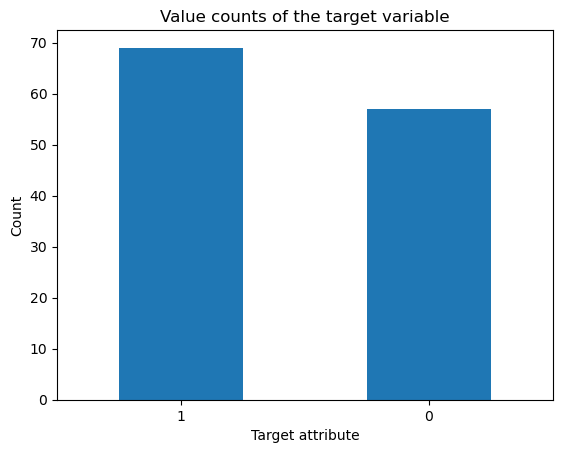

In [7]:
# Checking for data imbalances

import matplotlib.pyplot as plt
acme_df.Y.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Target attribute")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.show()

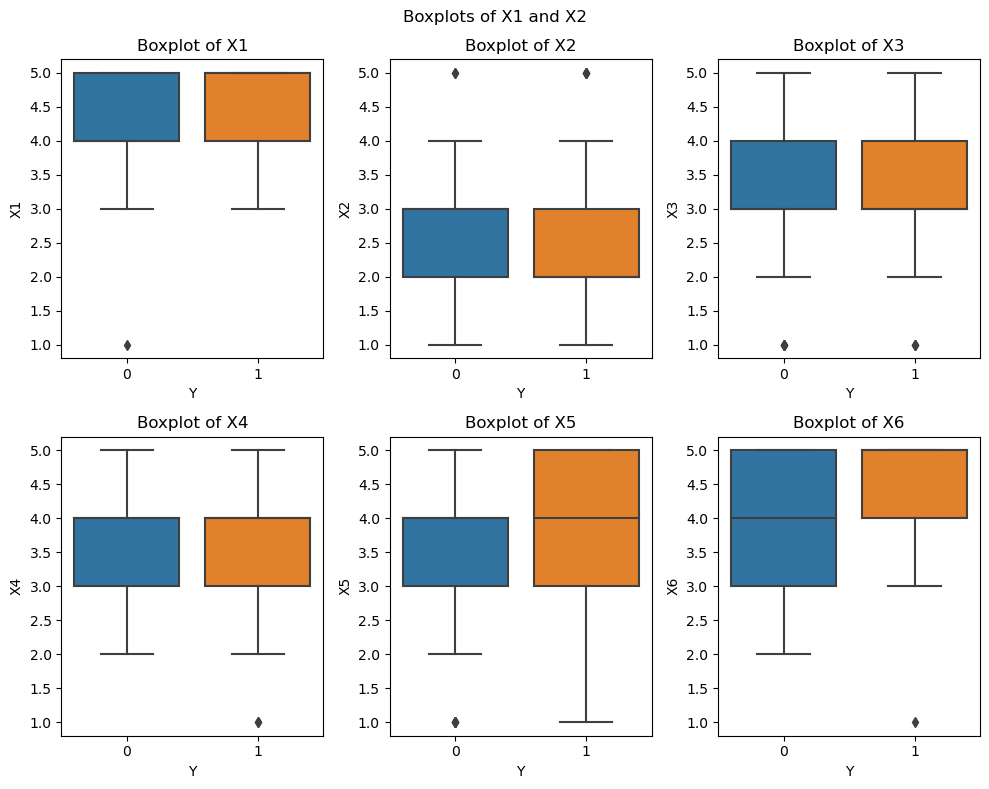

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and 6 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# X1 boxplot
sns.boxplot(x=acme_df['Y'], y=acme_df['X1'], ax=axes[0,0])
axes[0,0].set_title('Boxplot of X1')
axes[0,0].set_xlabel('Y')
axes[0,0].set_ylabel('X1')

# X2 boxplot
sns.boxplot(x=acme_df['Y'], y=acme_df['X2'], ax=axes[0,1])
axes[0,1].set_title('Boxplot of X2')
axes[0,1].set_xlabel('Y')
axes[0,1].set_ylabel('X2')

# X3 boxplot
sns.boxplot(x=acme_df['Y'], y=acme_df['X3'], ax=axes[0,2])
axes[0,2].set_title('Boxplot of X3')
axes[0,2].set_xlabel('Y')
axes[0,2].set_ylabel('X3')

# X4 boxplot
sns.boxplot(x=acme_df['Y'], y=acme_df['X4'], ax=axes[1,0])
axes[1,0].set_title('Boxplot of X4')
axes[1,0].set_xlabel('Y')
axes[1,0].set_ylabel('X4')

# X5 boxplot
sns.boxplot(x=acme_df['Y'], y=acme_df['X5'], ax=axes[1,1])
axes[1,1].set_title('Boxplot of X5')
axes[1,1].set_xlabel('Y')
axes[1,1].set_ylabel('X5')


# X5 boxplot
sns.boxplot(x=acme_df['Y'], y=acme_df['X6'], ax=axes[1,2])
axes[1,2].set_title('Boxplot of X6')
axes[1,2].set_xlabel('Y')
axes[1,2].set_ylabel('X6')

# Set the overall title for the plot
fig.suptitle('Boxplots of X1 and X2')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### Analysis
- The company seems to be doing well in terms of timely deliveries (X1) as both happy and unhappy customers are averaging above 4.3
- In terms of X2, the company has performed poorly in terms of items in the order meeting costomer expectations (correct order or good quality) and this rated similarly by both happy and unhappy customers 
- The company has performed averagely in terms of product availability and pricing - X3 and X4
- Both happy and unhappy customers seem to be a bit more satisfied with the app on average (X6) though the distribution of their responses are quite different
- Barplots indicate X5 and X6 could be useful predictors as the ratings distribution for happy and unhappy customers are slightly different unlike for other variables where it's largely the same. 

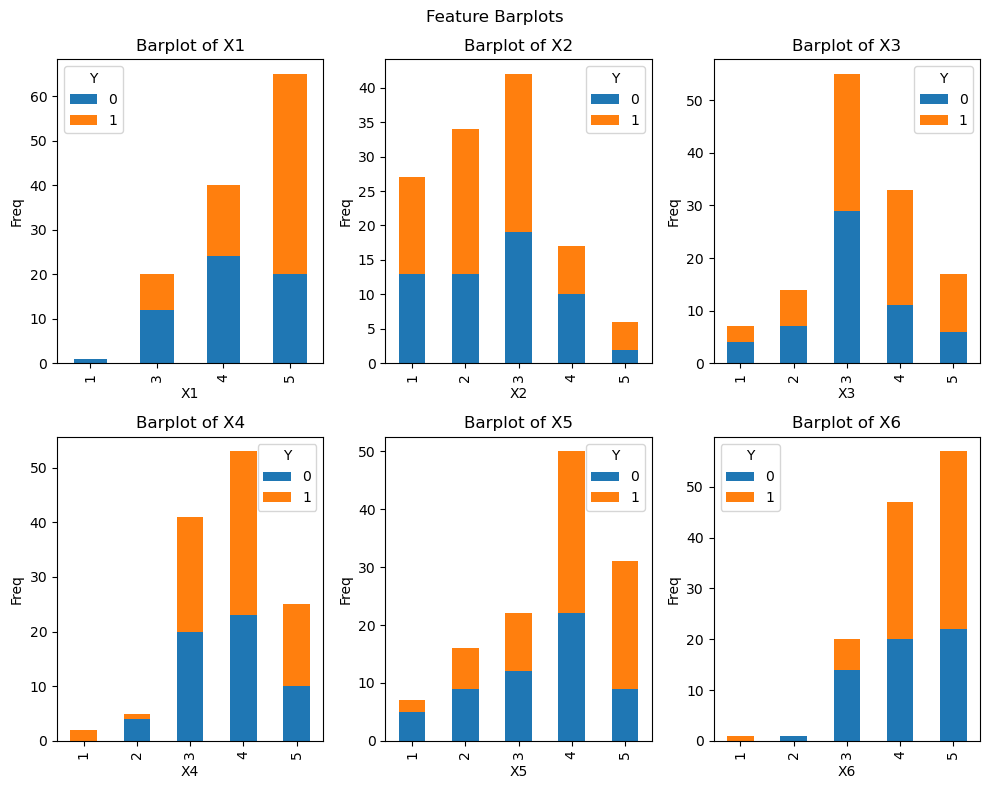

In [10]:
un_pivot = pd.melt(acme_df, id_vars = 'Y', value_vars = ['X1', 'X2', 'X3','X4','X5','X6'],
                   var_name ='feature', value_name ='rating')

un_pivot = un_pivot.pivot_table(index=['feature','rating'], columns=['Y'], aggfunc=len).reset_index()
un_pivot.head(5)

# Create a figure and 6 subplots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))


un_pivot.loc[(un_pivot['feature'] == "X1")].plot(x ='rating', kind='bar', stacked = True,ax=axes[0,0])
axes[0,0].set_title('Barplot of X1')
axes[0,0].set_xlabel('X1')
axes[0,0].set_ylabel('Freq')

un_pivot.loc[(un_pivot['feature'] == "X2")].plot(x ='rating', kind='bar', stacked = True,ax=axes[0,1])
axes[0,1].set_title('Barplot of X2')
axes[0,1].set_xlabel('X2')
axes[0,1].set_ylabel('Freq')

un_pivot.loc[(un_pivot['feature'] == "X3")].plot(x ='rating', kind='bar', stacked = True,ax=axes[0,2])
axes[0,2].set_title('Barplot of X3')
axes[0,2].set_xlabel('X3')
axes[0,2].set_ylabel('Freq')

un_pivot.loc[(un_pivot['feature'] == "X4")].plot(x ='rating', kind='bar', stacked = True,ax=axes[1,0])
axes[1,0].set_title('Barplot of X4')
axes[1,0].set_xlabel('X4')
axes[1,0].set_ylabel('Freq')

un_pivot.loc[(un_pivot['feature'] == "X5")].plot(x ='rating', kind='bar', stacked = True,ax=axes[1,1])
axes[1,1].set_title('Barplot of X5')
axes[1,1].set_xlabel('X5')
axes[1,1].set_ylabel('Freq')

un_pivot.loc[(un_pivot['feature'] == "X6")].plot(x ='rating', kind='bar', stacked = True,ax=axes[1,2])
axes[1,2].set_title('Barplot of X6')
axes[1,2].set_xlabel('X6')
axes[1,2].set_ylabel('Freq')

# Set the overall title for the plot
fig.suptitle('Feature Barplots')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Evaluating Multiple classification models

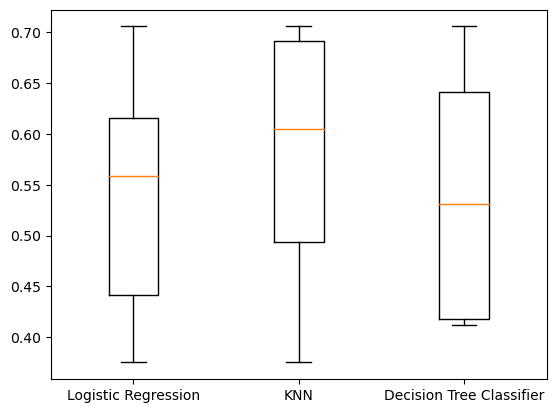

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Create arrays for the features and the target variable

X = acme_df.drop(["Y","X1","X2","X3","X4"], axis=1).values
#X = acme_df.drop(["Y"], axis=1).values
# X = acme_df[["X5"]].values
y = acme_df["Y"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify=y)

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
    # Instantiate a KFold object
    kf = KFold(n_splits=6, random_state=12, shuffle=True)
    
    # Perform cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
    
plt.boxplot(results, labels=models.keys())
plt.show()

In [64]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    test_score = model.score(X_test, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.5769230769230769
KNN Test Set Accuracy: 0.4230769230769231
Decision Tree Classifier Test Set Accuracy: 0.6923076923076923


## KNN Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.4230769230769231


### Hyperparameter Tuning for KNN with RandomizedSearchCV

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
kf = 20
params = {"n_neighbors": np.arange(1,50)}

knn_cv = RandomizedSearchCV(knn, params, cv=kf)

# Fit the data to the model
knn_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Tuned KNN Best Accuracy Score: {}".format(knn_cv.best_score_))


Tuned KNN Parameters: {'n_neighbors': 36}
Tuned KNN Best Accuracy Score: 0.55


In [67]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=27)

# Fit the model to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2 10]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       0.55      0.86      0.67        14

    accuracy                           0.54        26
   macro avg       0.52      0.51      0.46        26
weighted avg       0.52      0.54      0.47        26



## Logistic Regression

In [68]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

[0.68621703 0.52090059 0.68621703 0.68621703 0.55433174 0.55433174
 0.49405264 0.68621703 0.46723895 0.68621703]
0.7321428571428572
[[ 2 10]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       0.55      0.86      0.67        14

    accuracy                           0.54        26
   macro avg       0.52      0.51      0.46        26
weighted avg       0.52      0.54      0.47        26



### Hyperparameter Tuning for Logistic Regression

In [69]:
# Hyperparameter Tuning with RandomizedSearchCV
# Create the parameter space
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

kf = 10
params = {"penalty": ["l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}],
         "solver":["newton-cg","saga", "lbfgs"]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.8775632653061224, 'solver': 'newton-cg', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.5408163265306123}
Tuned Logistic Regression Best Accuracy Score: 0.5900000000000001


## Random Forest

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming acme_df is already loaded

# Pre-processing
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
X = acme_df[features]
y = acme_df['Y']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_val)

# Evaluation
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {acc*100:.2f}%")



Validation Accuracy: 61.54%


## Conclusion

After several iterations with various models and hypertuning parameters for these models, I was unable to build a model with the required accuracy. I will attribute this to the small size of the dataset